# 1. Novas Perguntas do CEO (Exercícios)

1. Qual o número de imóveis por ano de construção?
2. Qual o menor número de quartos por ano de construção de imóveis?
3. Qual o preço de compra mais alto por cada número de quarto?
4. Qual a soma de todos os preços de compra por número de quartos?
5. Qual a soma de todos os preços de compra por número de quartos er banheiros?
6. Qual o temanho médio das salas dos imóveis por ano de construção?
7. Qual o tamnho mediano das salas dos imóveis por ano de construção?
8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?
9. Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?
10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

# 2. Planejamento da solução 

## 2.1. (O que eu vou entregar? Planilha, gráfico, modelo de ML, ...)

- Email + 2 anexos:
    + Respostas e Perguntas
- Anexo 01: Um dashboard com 3 gráficos
- Anexo 02: Um mapa no formato html.

## 2.2. Ferramenta (Qual ferramenta usar?)

- Python 3.8.0
- Jupyter Notebook


## 2.3. Processo (Como fazer?)

### Qual o número de imóveis por ano de construção?

Contar o número de ids por ano de construção


### Qual o menor número de quartos por ano de construção de imóveis?

Filtrar todos os imóveis por ano de construção e selecionar o menor número de quartos.

### Qual o preço de compra mais alto por cada número de quarto?

Filtrar todos os imóveis por número de quartos e selecionar o de maior preço.

### Qual a soma de todos os preços de compra por número de quartos?

Filtrar os imóveis por número de quartos e somar todos os preços.

### Qual a soma de todos os preços de compra por número de quartos e banheiros?

Filtrar os imóveis por número de quartos e banheiros somar todos os preços.

### Qual o tamanho médio das salas dos imóveis por ano de construção?

Filtrar os imóveis por ano de construção e fazer o desvio-padrão do tamanho das salas.

### Qual o tamanho mediano das salas dos imóveis por ano de construção?

Filtrar os imóveis por ano de construção e fazer a mediana do tamanho das salas.

### Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

Filtrar os imóveis por ano de construção e fazer o desvio-padrão do tamanho das salas.

### Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?

Filtrar os imóveis por ano, fazer um gráfico no qual o eixo x tem os anos, e o y tenha a média do preço do ano.
Estudar uma biblioteca que tenha alguma função que desenhe um gráfico de linhas.

### Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

Modificar o mapa da entrega anterior fazendo com que os pontos tenham o tamanho dependente do preço.

# 3. Imports e dataset

In [34]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x) # Modificar notação científica
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('datasets/kc_house_data.csv')

In [7]:
data.shape

(21613, 21)

In [8]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 3. Testando algumas operações com `groupby`

In [13]:
df_grouped = data[['id', 'bedrooms']].groupby('bedrooms')

In [14]:
for bedrooms, frame in df_grouped:
    print('numero de quartos: {}'.format(bedrooms))
    print(frame.shape, end = '\n\n')

numero de quartos: 0
(13, 2)

numero de quartos: 1
(199, 2)

numero de quartos: 2
(2760, 2)

numero de quartos: 3
(9824, 2)

numero de quartos: 4
(6882, 2)

numero de quartos: 5
(1601, 2)

numero de quartos: 6
(272, 2)

numero de quartos: 7
(38, 2)

numero de quartos: 8
(13, 2)

numero de quartos: 9
(6, 2)

numero de quartos: 10
(3, 2)

numero de quartos: 11
(1, 2)

numero de quartos: 33
(1, 2)



In [15]:
for bedrooms, frame in df_grouped:
    print('numero de quartos: {}'.format(bedrooms))
    print(frame.head(), end = '\n\n')

numero de quartos: 0
              id  bedrooms
875   6306400140         0
3119  3918400017         0
3467  1453602309         0
4868  6896300380         0
6994  2954400190         0

numero de quartos: 1
             id  bedrooms
154  7920100045         1
264  2123039032         1
350  7325600160         1
465  8658300340         1
648   922049078         1

numero de quartos: 2
            id  bedrooms
2   5631500400         2
11  9212900260         2
18    16000397         2
23  8091400200         2
31  2426039314         2

numero de quartos: 3
           id  bedrooms
0  7129300520         3
1  6414100192         3
4  1954400510         3
6  1321400060         3
7  2008000270         3

numero de quartos: 4
            id  bedrooms
3   2487200875         4
5   7237550310         4
15  9297300055         4
17  6865200140         4
20  6300500875         4

numero de quartos: 5
            id  bedrooms
14  1175000570         5
22  7137970340         5
42  7203220400         5
51  723

# 4. Respondendo às questões do CEO

In [16]:
# 1. Qual o número de imóveis por ano de construção?
data[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [17]:
# 2. Qual o menor número de quartos por ano de construção de imóveis?
data[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [19]:
# 3. Qual o preço de compra mais alto por cada número de quarto?
data[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [23]:
# 4. Qual a soma de todos os preços de compra por número de quartos?
data[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.000
1,63210934.000
2,1107788602.000
3,4580263939.000
4,4372957028.000
5,1259346326.000
6,224541613.000
7,36145017.000
8,14366000.000


In [24]:
# 5. Qual a soma de todos os preços de compra por número de quartos er banheiros?
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()

price
bedrooms bathrooms            
0        0.000     3642600.000
         0.750      265000.000
         1.000      228000.000
         1.500      288000.000
         2.500      899950.000
...                        ...
10       2.000      650000.000
         3.000      660000.000
         5.250     1148000.000
11       3.000      520000.000
33       1.750      640000.000

[144 rows x 1 columns]

In [25]:
# 6. Qual o temanho médio das salas dos imóveis por ano de construção?
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.011
1901,1763.621
1902,1919.630
1903,1507.739
1904,1603.178
...,...
2011,2313.685
2012,2378.741
2013,2636.592


In [26]:
# 7. Qual o tamnho mediano das salas dos imóveis por ano de construção?
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.000
1901,1610.000
1902,1600.000
1903,1505.000
1904,1280.000
...,...
2011,2270.000
2012,2237.500
2013,2580.000


In [27]:
# 8. Qual o desvio padrão do tamanho das salas dos imóveis por ano de construção?
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.944
1901,668.232
1902,878.659
1903,469.723
1904,1076.871
...,...
2011,804.864
2012,771.430
2013,883.499


In [ ]:
# 9. Como é o crescimento médio de preços de compras dos imóveis, por ano, por dia e pela semana do ano?

In [ ]:
# Primeiro gráfico

In [28]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [29]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [30]:
# Gráfico de Barras
data['year'] = pd.to_datetime(data['date']).dt.year

In [32]:
data['year'].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: year, dtype: int64

In [33]:
data[['price', 'year']].groupby('year').sum().reset_index()

,year,price
0,2014,7889841842.000
1,2015,3783083166.000


<BarContainer object of 2 artists>

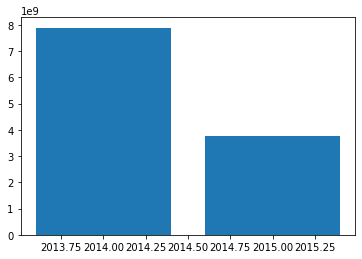

In [37]:
by_year = data[['price', 'year']].groupby('year').sum().reset_index()
plt.bar(by_year['year'], by_year['price'])

In [39]:
# Segundo gráfico
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()

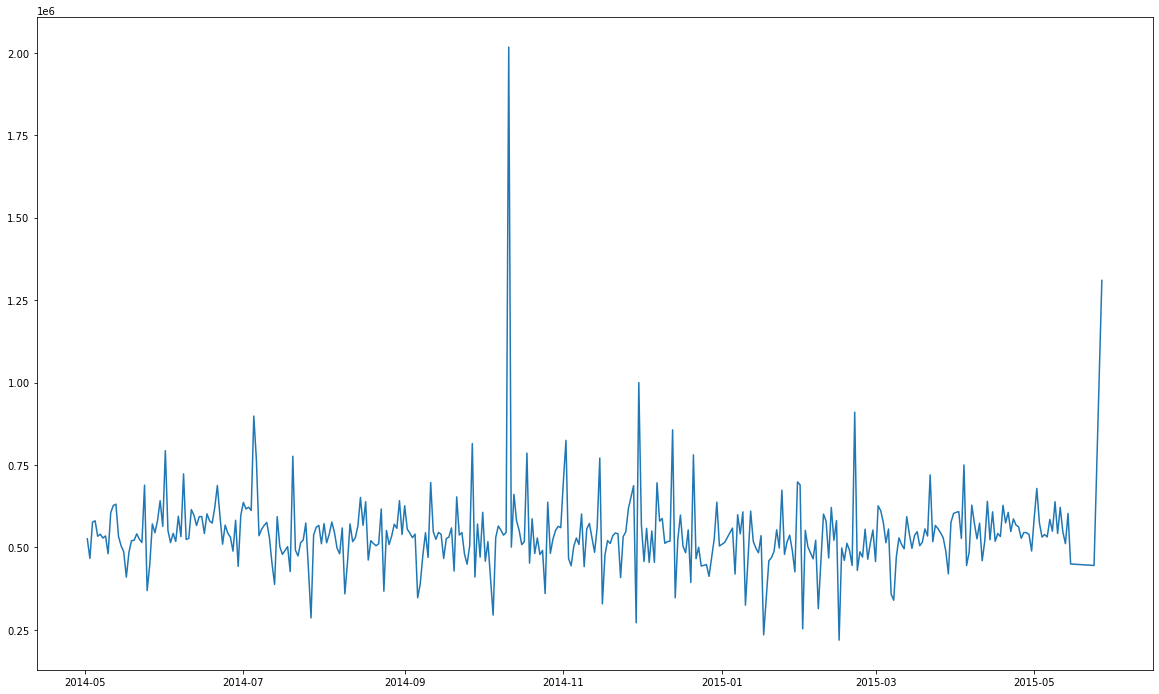

In [41]:
plt.figure(figsize=(20, 12))
plt.plot(by_day['day'], by_day['price'])

In [ ]:
# Terceiro gráfico: semana do ano

In [44]:
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')

In [45]:
data['year_week'].head()

0    2014-41
1    2014-49
2    2015-08
3    2014-49
4    2015-07
Name: year_week, dtype: object

In [46]:
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

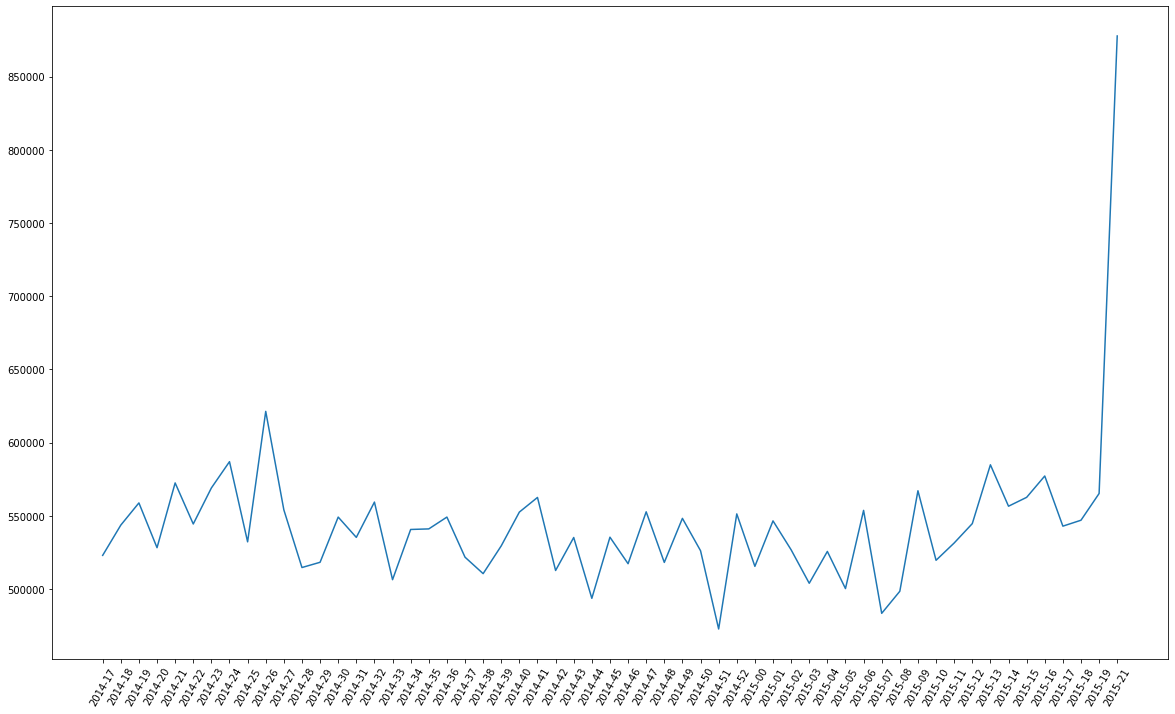

In [50]:
plt.figure(figsize=(20, 12))
plt.plot(by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation = 60);

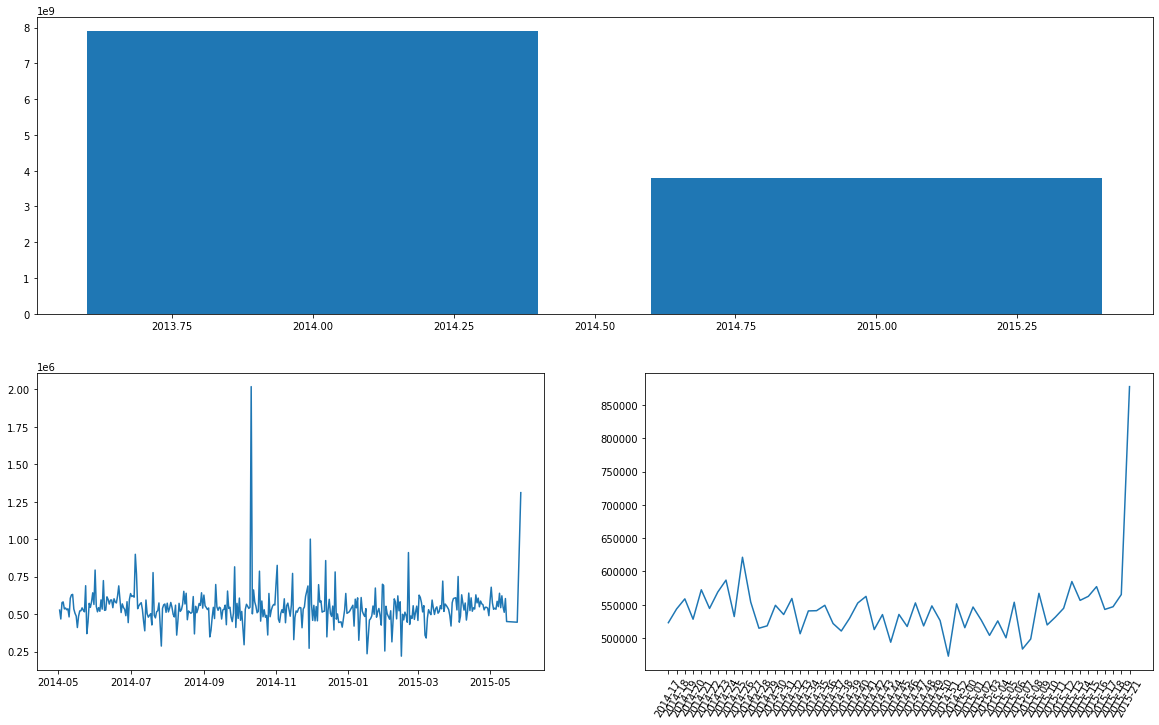

In [56]:
from matplotlib import gridspec

fig = plt.figure(figsize = (20, 12))
specs = gridspec.GridSpec(ncols = 2, nrows = 2, figure = fig)


ax1 = fig.add_subplot(specs[0, :]) # Primeira linha
ax2 = fig.add_subplot(specs[1, 0]) # Segunda linha: Primeira coluna
ax3 = fig.add_subplot(specs[1, 1]) # Segunda linha: Segunda coluna



# Primeiro Gráfico
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price', 'year']].groupby('year').sum().reset_index()
ax1.bar(by_year['year'], by_year['price'])

# Segundo gráfico
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()
ax2.plot(by_day['day'], by_day['price'])

# Terceiro Gráfico
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot(by_year_week['year_week'], by_year_week['price'])
plt.xticks(rotation = 60);

In [ ]:
# 10. Eu gostaria de olhar no mapa e conseguir identificar as casas com o maior preço.

In [1]:
import plotly.express as px

houses = data[['id', 'lat', 'long', 'price']]

fig = px.scatter_mapbox(houses,
                       lat = 'lat',
                       lon = 'long',
                       size = 'price',
                       color_continuous_scale = px.colors.cyclical.IceFire,
                       size_max = 15,
                       zoom = 10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin= {'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

NameError: name 'data' is not defined

# 5. Exercícios

1. Crie uma nova coluna chamada: "dormitory_type""
2. Faça um gráfico de barras que represente a soma dos preços pelo número de quartos.
3. Faça um gráfico de linhas que represente a média dos preços pelo ano de construção dos imóveis.
4. Faça um gráfico de barras que represente a média dos preços pelo tipo de dormitório.
5. Faça um gráfico de linha que mostre a evolução da média dos preços pelo ano da reforma dos imóveis, a partir do ano de 1930.
6. Faça uma tabela que mostre a média dos preços por ano de construção e tipo de dormitórios dos imóveis.
7. Crie um Dashboard com os gráficos das questões 02, 04 (Dashboard: 2 colunas)
8. Crie um Dashboard com os gráficos das questões 02, 03, 04 (Dashboard: 2 colunas)
9. Crie um Dashboard com os gráficos das questões 03, 05 (Dashboard: 2 linhas)
10. Faça um gráfico (mapa) com o tamanho dos pontos sendo igual ao tamnho da sala de estar.